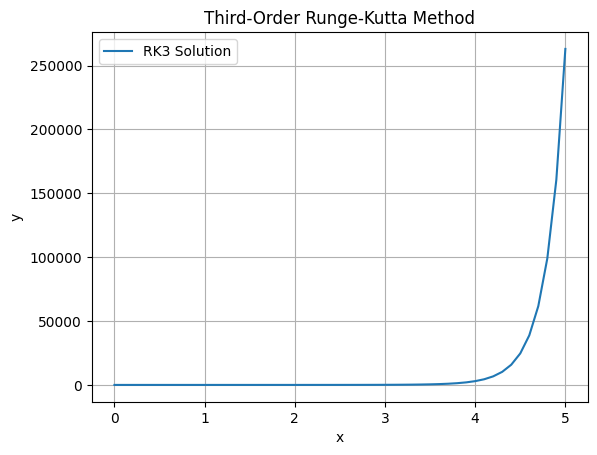

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Part 1
def runge_kutta_3(f, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)

    x[0] = x0
    y[0] = y0

    for i in range(n):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k1)
        k3 = h * f(x[i] + 0.75 * h, y[i] + 0.75 * k2)

        y[i + 1] = y[i] + (1 / 9) * (2 * k1 + 3 * k2 + 4 * k3) #y[i + 1]
        x[i + 1] = x[i] + h

    return x, y

def example_function(x, y):
    return x * y 

x0 = 0
y0 = 1
h = 0.1
n = 50  

x, y = runge_kutta_3(example_function, x0, y0, h, n)

#Plotting
plt.plot(x, y, label="RK3 Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Third-Order Runge-Kutta Method")
plt.legend()
plt.grid()
plt.show()

In [3]:
#Part 4
#Define the ODE
def f(x, y):
    return -2 * x * y  

def adams_bashforth_4th_order(x0, y0, h, steps): #Implement the 4th-order Adams-Bashforth method
    xs = [x0]
    ys = [y0]
    
    
    def runge_kutta_4(x, y, h): #Use 4th-order Runge-Kutta to compute the first 3 steps
        k1 = f(x, y)
        k2 = f(x + h / 2, y + h * k1 / 2)
        k3 = f(x + h / 2, y + h * k2 / 2)
        k4 = f(x + h, y + h * k3)
        return y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

    for _ in range(3):
        y_next = runge_kutta_4(xs[-1], ys[-1], h)
        xs.append(xs[-1] + h)
        ys.append(y_next)

    
    for i in range(3, steps):
        x_next = xs[-1] + h
        y_next = ys[-1] + h * (
            (55 / 24) * f(xs[-1], ys[-1])
            - (59 / 24) * f(xs[-2], ys[-2])
            + (37 / 24) * f(xs[-3], ys[-3])
            - (9 / 24) * f(xs[-4], ys[-4])
        )
        xs.append(x_next)
        ys.append(y_next)

    return np.array(xs), np.array(ys)


x0 = 0
y0 = 1 
h = 0.1  
steps = 20

#Solve the ODE
xs, ys = adams_bashforth_4th_order(x0, y0, h, steps)

#Results
print(f"{'x':<10}{'y':<10}")
for x, y in zip(xs, ys):
    print(f"{x:<10.4f}{y:<10.4f}")


x         y         
0.0000    1.0000    
0.1000    0.9900    
0.2000    0.9608    
0.3000    0.9139    
0.4000    0.8522    
0.5000    0.7790    
0.6000    0.6979    
0.7000    0.6129    
0.8000    0.5277    
0.9000    0.4452    
1.0000    0.3682    
1.1000    0.2985    
1.2000    0.2372    
1.3000    0.1847    
1.4000    0.1409    
1.5000    0.1054    
1.6000    0.0773    
1.7000    0.0555    
1.8000    0.0391    
1.9000    0.0270    
2.0000    0.0183    


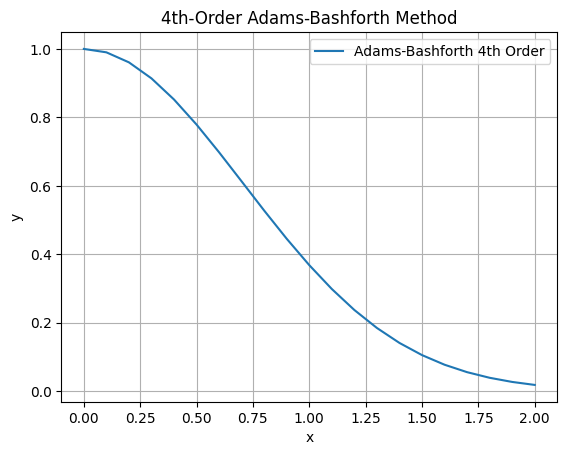

In [4]:
plt.plot(xs, ys, label="Adams-Bashforth 4th Order")
plt.xlabel("x")
plt.ylabel("y")
plt.title("4th-Order Adams-Bashforth Method")
plt.legend()
plt.grid()
plt.show()